## Caricamento delle Librerie e dei Dati

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df_NonNormalizzato = pd.read_csv("TabelloneNonNormalizzato.csv")
df = pd.read_csv("TabelloneNormalizzato.csv")

In [3]:
tmp = pd.DataFrame(df_NonNormalizzato['Date'])
tmp['DerivataGDP'] = df_NonNormalizzato['GDP'].diff()

diff_values = df_NonNormalizzato['GDP'].diff()

# Creare una nuova colonna con la derivata desiderata
tmp['derivata_desiderata'] = np.nan

# Inizializzare il primo valore
tmp.loc[0, 'derivata_desiderata'] = np.nan

# Calcolare la derivata desiderata
for i in range(1, len(tmp)):
    if diff_values[i] != 0:
        tmp.loc[i, 'DerivataGDP'] = diff_values[i]
    else:
        tmp.loc[i, 'DerivataGDP'] = tmp.loc[i - 1, 'DerivataGDP']

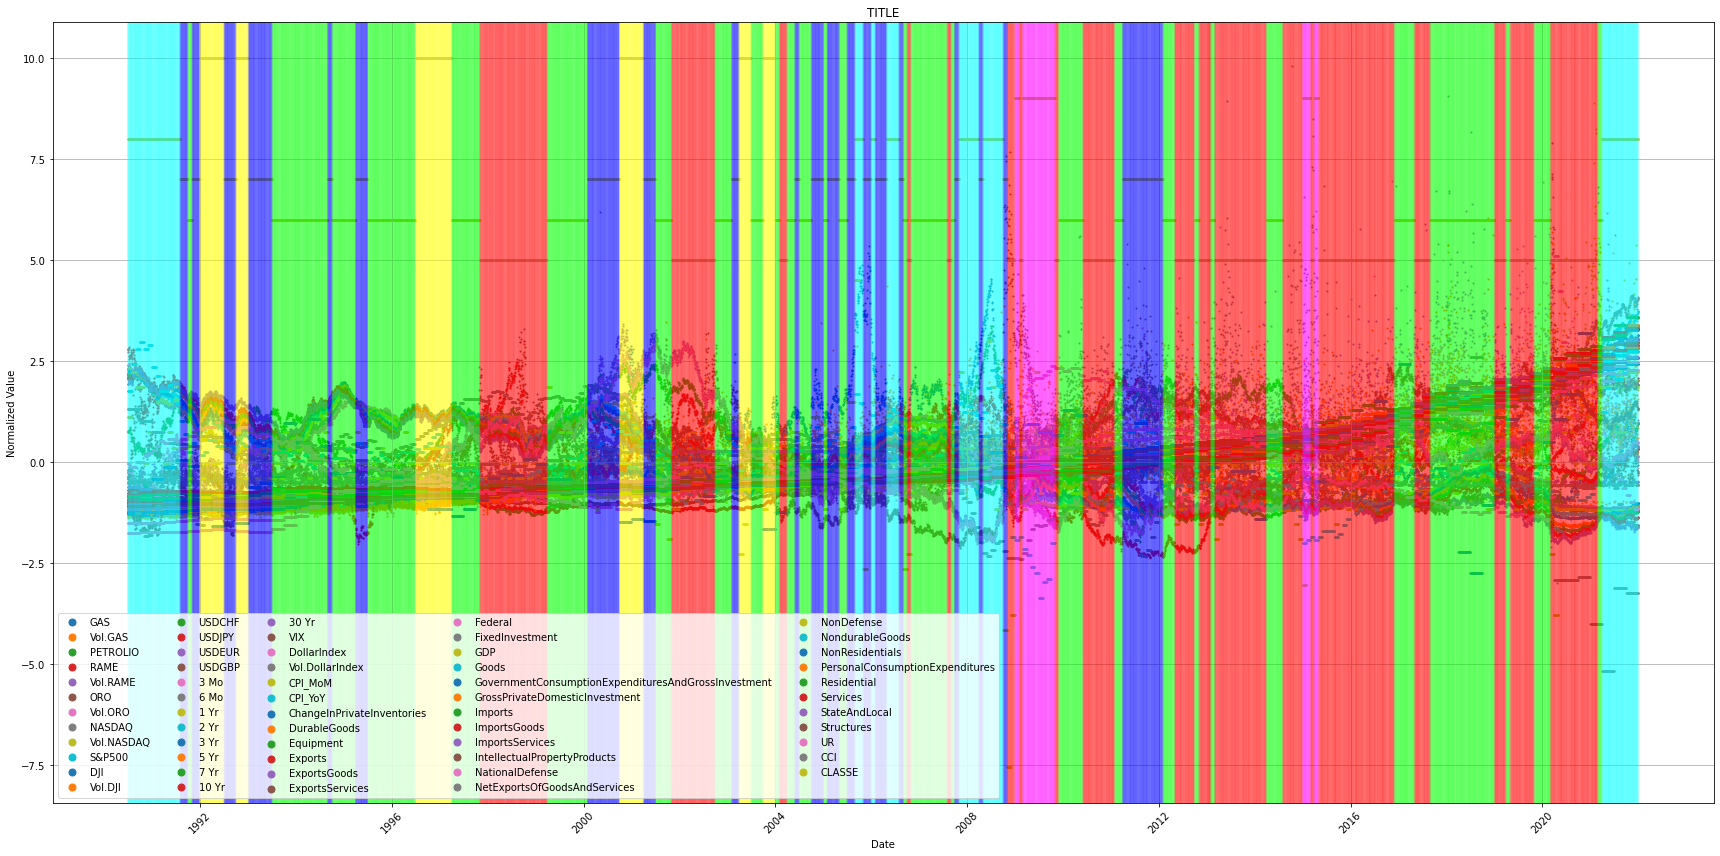

In [4]:
# Creiamo un grafico vuoto

df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

plt.figure(figsize=(24, 12))

#CRESCITA ECONOMICA CON INFLAZIONE BASSA
highlight_dates0 = df[(df_NonNormalizzato['CPI_YoY'] >= 0) & (df_NonNormalizzato['CPI_YoY'] < 2) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates0 = pd.to_datetime(highlight_dates0, format='%Y/%m/%d')
for date in highlight_dates0:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_dates1 = df[(df_NonNormalizzato['CPI_YoY'] >= 2) & (df_NonNormalizzato['CPI_YoY'] < 3) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates1 = pd.to_datetime(highlight_dates1, format='%Y/%m/%d')
for date in highlight_dates1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_dates2 = df[(df_NonNormalizzato['CPI_YoY'] >= 3) & (df_NonNormalizzato['CPI_YoY'] < 4) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates2 = pd.to_datetime(highlight_dates2, format='%Y/%m/%d')
for date in highlight_dates2:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_dates3 = df[(df_NonNormalizzato['CPI_YoY'] >= 4) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates3 = pd.to_datetime(highlight_dates3, format='%Y/%m/%d')
for date in highlight_dates3:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_dates4 = df[(df_NonNormalizzato['CPI_YoY'] < 0) & (tmp['DerivataGDP'] > 0)]['Date']
#highlight_dates4 = pd.to_datetime(highlight_dates4, format='%Y/%m/%d')
for date in highlight_dates4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_dates5 = df[tmp['DerivataGDP'] <= 0]['Date']
#highlight_dates5 = pd.to_datetime(highlight_dates5, format='%Y/%m/%d')
for date in highlight_dates5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
for index, row in df.iterrows():
    if(df['Date'][index] in highlight_dates0.values):
        df.at[index, 'CLASSE'] = 0 + 5
    if(df['Date'][index] in highlight_dates1.values):
        df.at[index, 'CLASSE'] = 1 + 5
    if(df['Date'][index] in highlight_dates2.values):
        df.at[index, 'CLASSE'] = 2 + 5
    if(df['Date'][index] in highlight_dates3.values):
        df.at[index, 'CLASSE'] = 3 + 5
    if(df['Date'][index] in highlight_dates4.values):
        df.at[index, 'CLASSE'] = 4 + 5
    if(df['Date'][index] in highlight_dates5.values):
        df.at[index, 'CLASSE'] = 5 + 5
        
df = df.dropna()
        
 # Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Dovrei ottenere un risultato simile con SAX

Numero dei simboli: 24


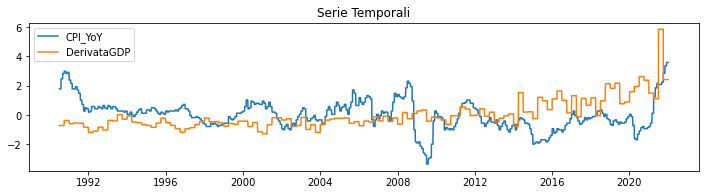

In [5]:
from sklearn.preprocessing import StandardScaler
from tslearn.piecewise import SymbolicAggregateApproximation

df_sax = pd.DataFrame()
df_sax['Date'] = df_NonNormalizzato['Date']
df_sax['Date'] = pd.to_datetime(df_sax['Date'], format='%Y/%m/%d')


df_sax['CPI_YoY'] = df_NonNormalizzato['CPI_YoY']
df_sax['DerivataGDP'] = tmp['DerivataGDP']
df_sax = df_sax[np.isnan(df_sax['DerivataGDP']) == False]

scaler = StandardScaler()

# Itera sulle colonne del DataFrame e normalizza ciascuna colonna
for col in df_sax.columns[1:]:
    df_sax[col] = scaler.fit_transform(df_sax[col].values.reshape(-1, 1))
    
# Definire il numero di simboli per la trasformazione SAX
n_sax_symbols = 5

# Creare la colonna SAX
def sax_transform(series, n_sax_symbols):
    sax = SymbolicAggregateApproximation(n_segments=len(series), alphabet_size_avg=n_sax_symbols)
    series_reshaped = series.values.reshape(1, -1, 1)  # Adattare la forma per tslearn
    sax_transformed = sax.fit_transform(series_reshaped)
    return sax_transformed.flatten()

df_sax['sax_labels'] = df_sax[['CPI_YoY', 'DerivataGDP']].apply(lambda row: sax_transform(row, n_sax_symbols), axis=1)

# Plot delle serie temporali con le etichette SAX
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_sax['Date'], df_sax['CPI_YoY'], label='CPI_YoY')
plt.plot(df_sax['Date'], df_sax['DerivataGDP'], label='DerivataGDP')
plt.legend()
plt.title('Serie Temporali')

#plt.subplot(2, 1, 2)
#plt.imshow(df_sax['sax_labels'].to_list(), interpolation='nearest', aspect='auto', cmap='viridis')
#plt.colorbar()
#plt.title('Etichette SAX')
#plt.show()

d = {}
i = 0
for elem in df_sax['sax_labels']:
    if(tuple(elem) not in d):
        d[tuple(elem)] = i
        i += 1
        
print("Numero dei simboli:", i)

l = []
for elem in df_sax['sax_labels']:
    l.append(d[tuple(elem)])
    
df_sax['sax_l'] = l

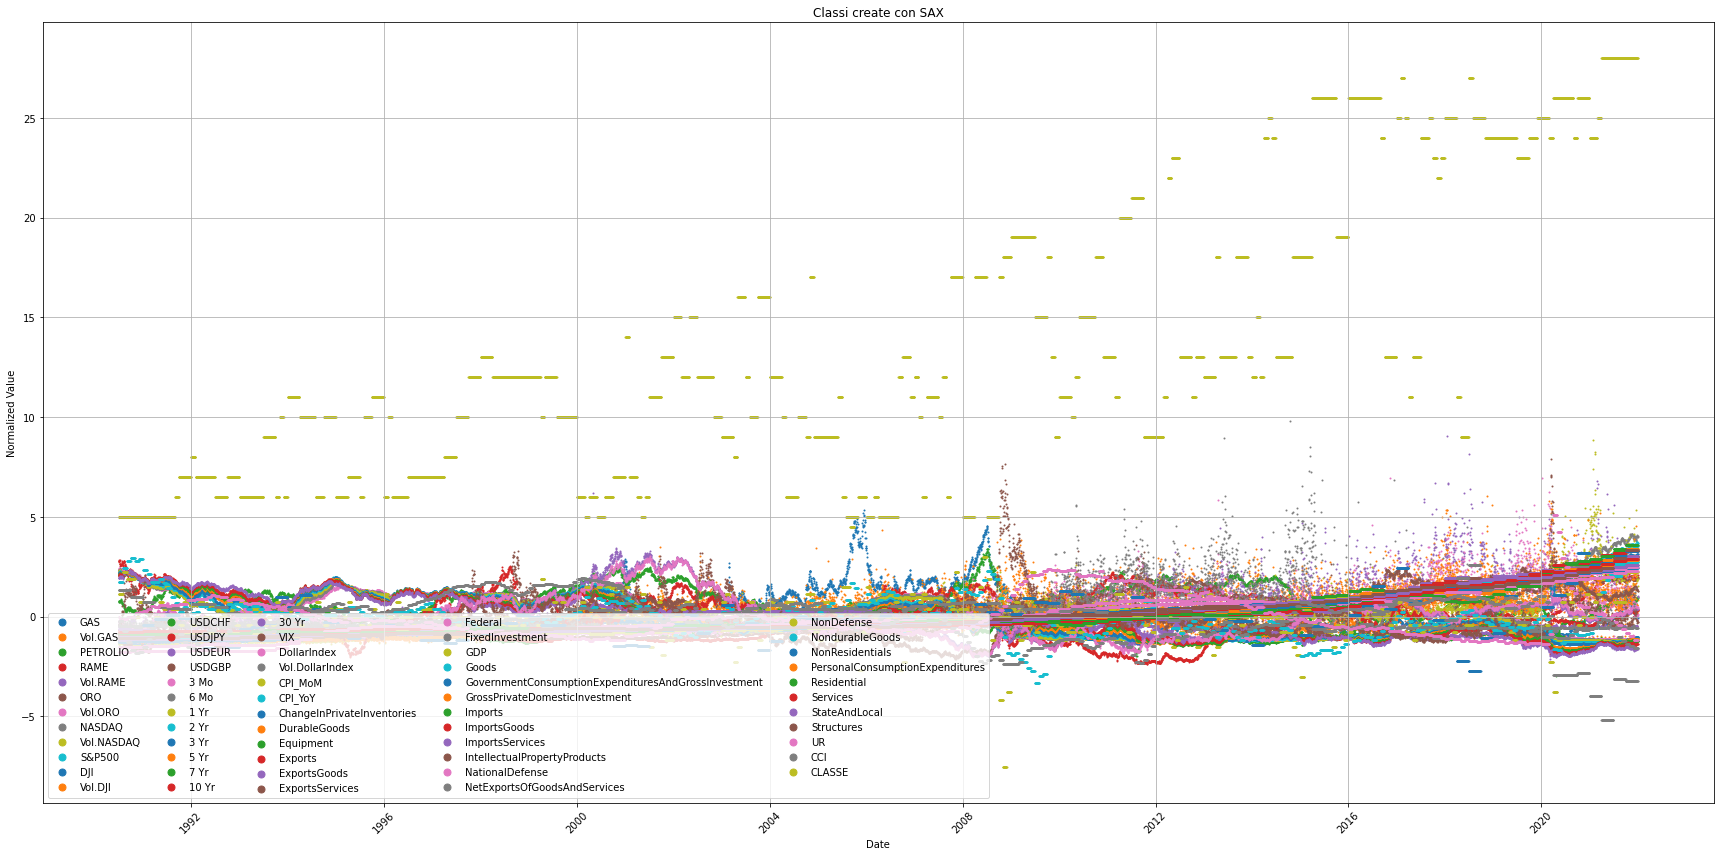

Ci sono 151 cambi di regime con 24 regimi possibili


In [6]:
df['CLASSE'] = df_sax['sax_l'] + 5

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Classi create con SAX')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASSE'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", i, "regimi possibili")

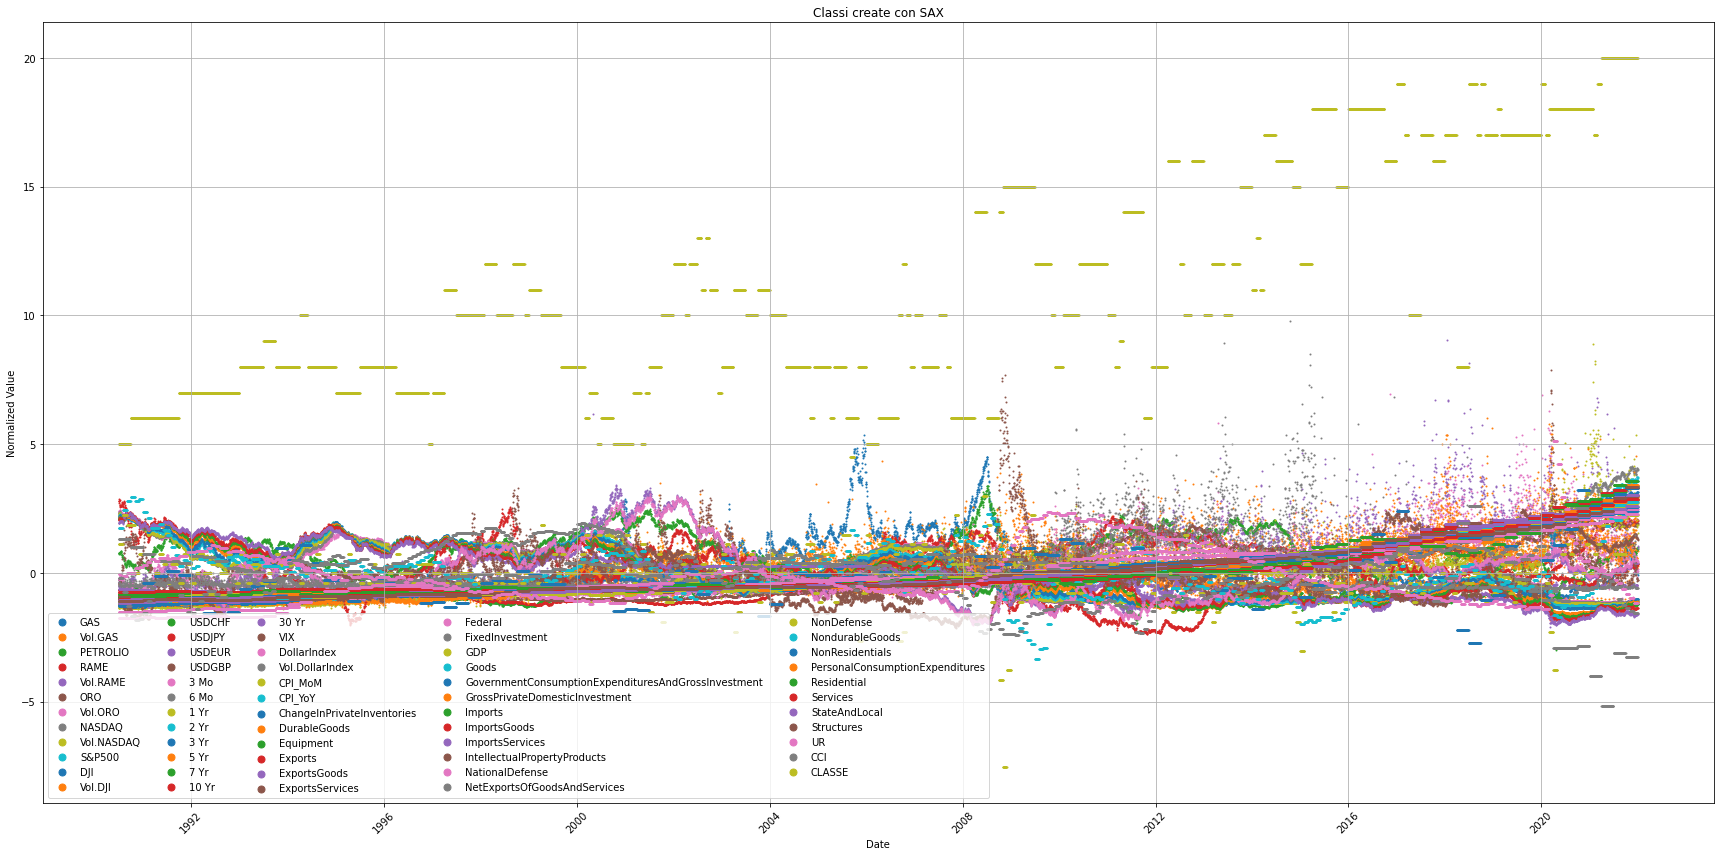

Ci sono 116 cambi di regime con 16 regimi possibili


In [7]:
n_sax_symbols = 4

df_sax['sax_labels'] = df_sax[['CPI_YoY', 'DerivataGDP']].apply(lambda row: sax_transform(row, n_sax_symbols), axis=1)

d = {}
i = 0
for elem in df_sax['sax_labels']:
    if(tuple(elem) not in d):
        d[tuple(elem)] = i
        i += 1
        
l = []
for elem in df_sax['sax_labels']:
    l.append(d[tuple(elem)])
    
df_sax['sax_l'] = l

df['CLASSE'] = df_sax['sax_l'] + 5

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Classi create con SAX')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASSE'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", i, "regimi possibili")

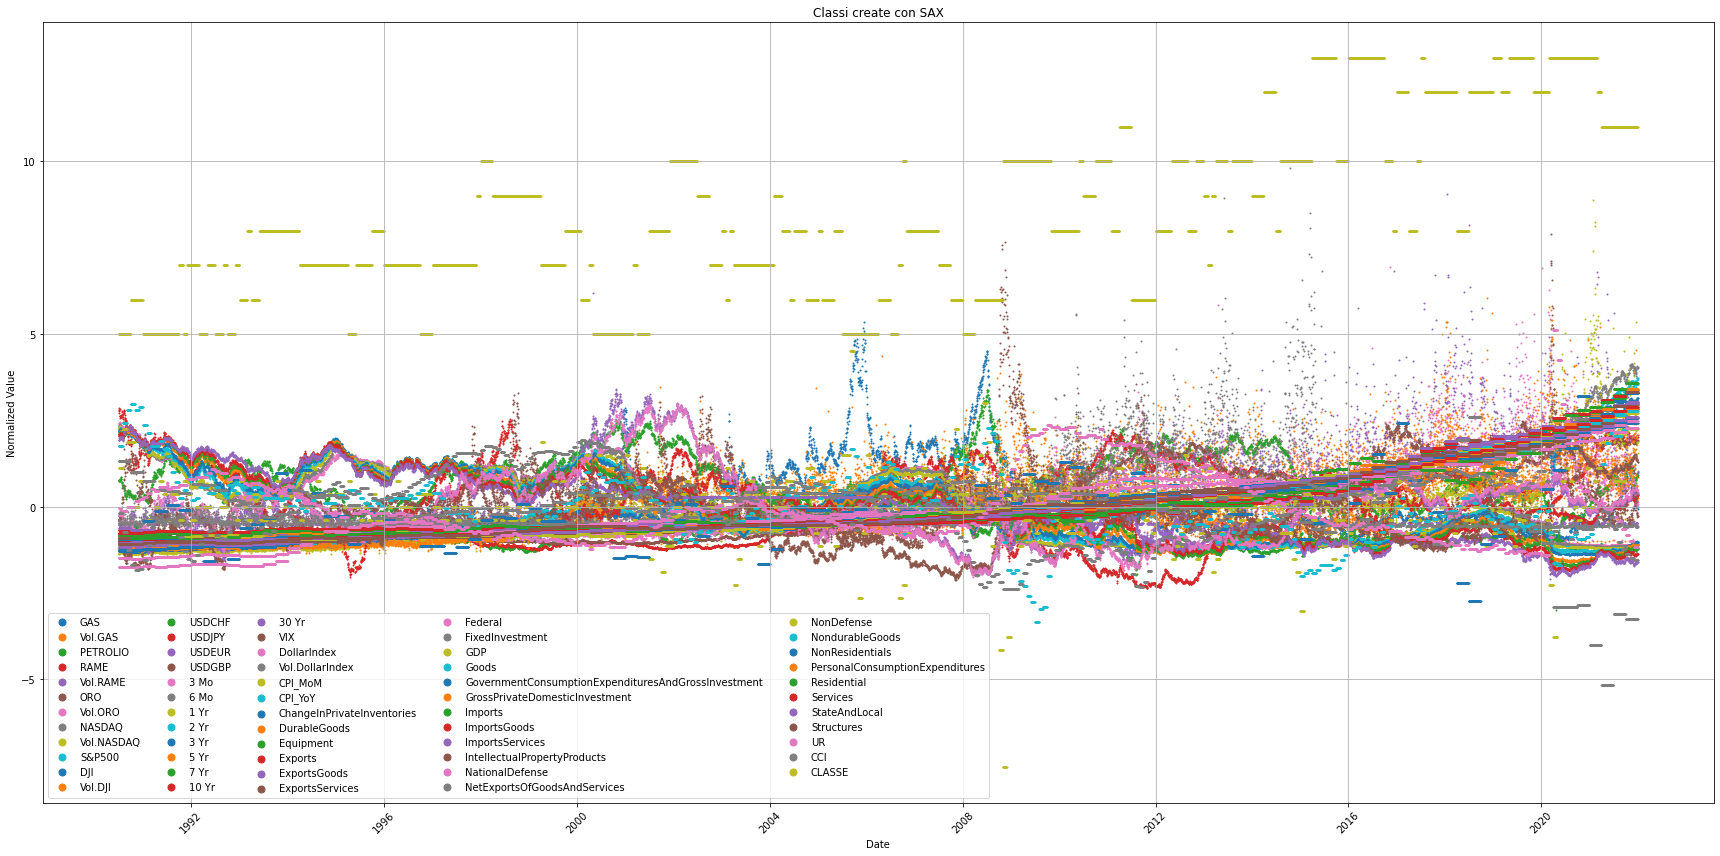

Ci sono 99 cambi di regime con 9 regimi possibili


In [8]:
n_sax_symbols = 3

df_sax['sax_labels'] = df_sax[['CPI_YoY', 'DerivataGDP']].apply(lambda row: sax_transform(row, n_sax_symbols), axis=1)

d = {}
i = 0
for elem in df_sax['sax_labels']:
    if(tuple(elem) not in d):
        d[tuple(elem)] = i
        i += 1
        
l = []
for elem in df_sax['sax_labels']:
    l.append(d[tuple(elem)])
    
df_sax['sax_l'] = l

df['CLASSE'] = df_sax['sax_l'] + 5

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Classi create con SAX')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASSE'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", i, "regimi possibili")

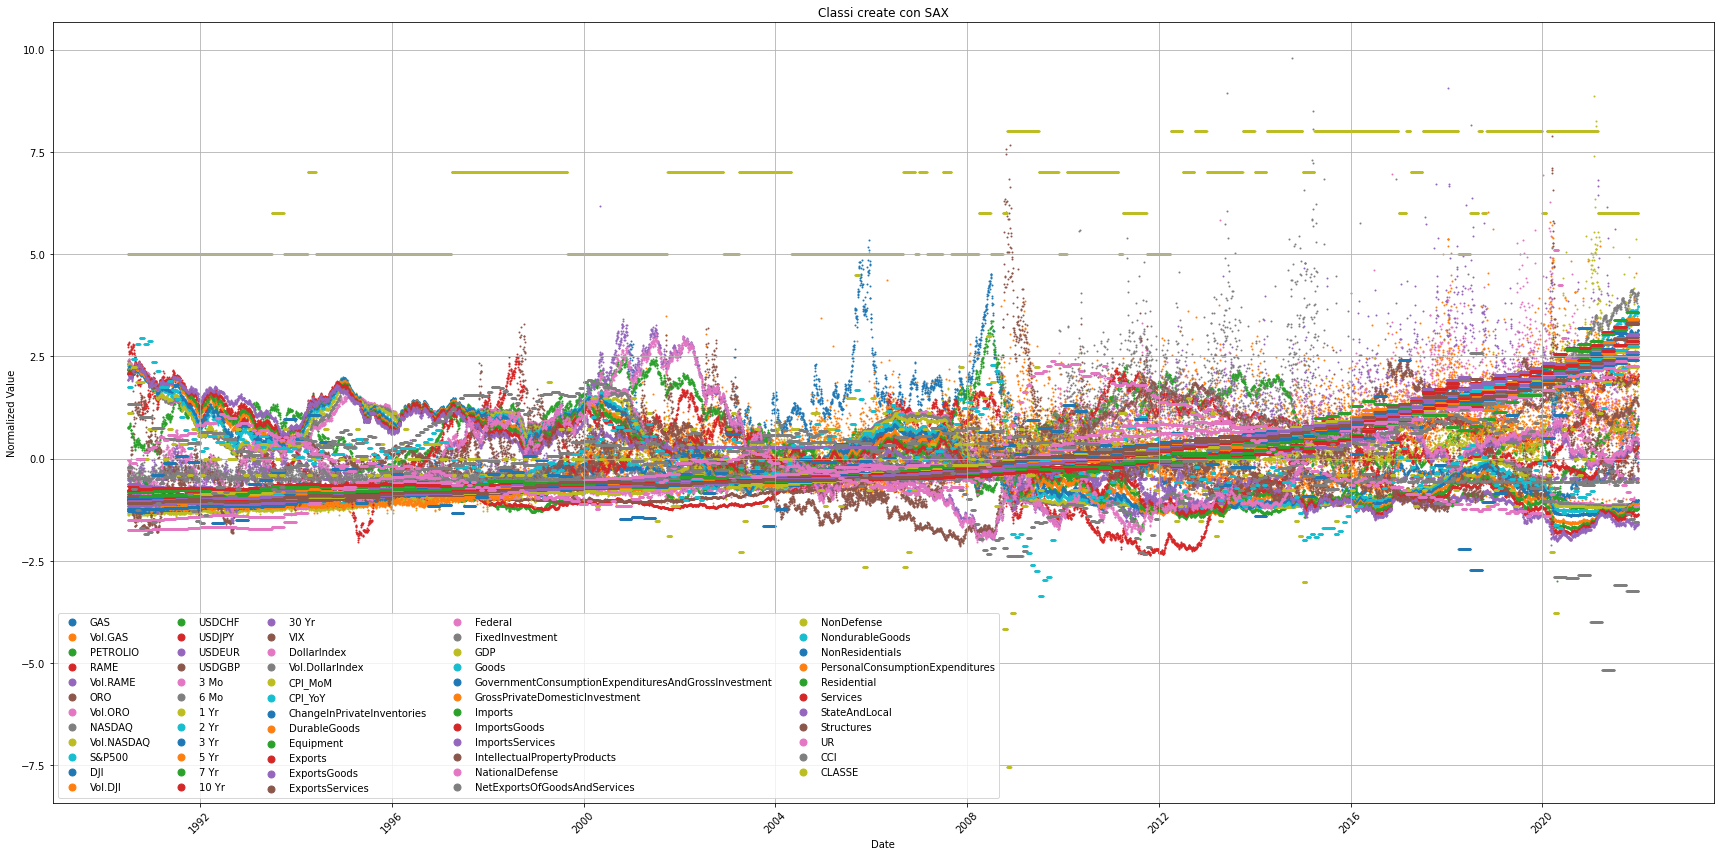

Ci sono 47 cambi di regime con 4 regimi possibili


In [9]:
n_sax_symbols = 2

df_sax['sax_labels'] = df_sax[['CPI_YoY', 'DerivataGDP']].apply(lambda row: sax_transform(row, n_sax_symbols), axis=1)

d = {}
i = 0
for elem in df_sax['sax_labels']:
    if(tuple(elem) not in d):
        d[tuple(elem)] = i
        i += 1
        
l = []
for elem in df_sax['sax_labels']:
    l.append(d[tuple(elem)])
    
df_sax['sax_l'] = l

df['CLASSE'] = df_sax['sax_l'] + 5

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Classi create con SAX')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASSE'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", i, "regimi possibili")

In [12]:
df.to_csv('DF_Normalizzato_ClasseCreataConSAX.csv', index=False)